In [1]:
# import usual suspects

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp
from datetime import datetime

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [2]:
######################## ######################## ######################## ######################## ########################
######################## ######################## ######################## ######################## ########################
#
# import cleaned weekly ufo data

ufo = pd.read_csv('../Data/Datasets/weeklufo_corona.csv',index_col=0)
# copy into w(orking)ufo df

wufo = ufo.copy().rename(columns={'rel_val_alltime':'weekly_ufopct'})

# confirm
ufo.tail()

,startdateweek,weekly_ufocount,weekly_ufopct,year,month,weeknum,week_id
761,2006-03-26,5,1.063830,2006,3,12,2006-12
762,2006-03-05,5,1.063830,2006,3,9,2006-9
763,2006-01-08,3,0.638298,2006,1,1,2006-1
764,2006-02-05,2,0.425532,2006,2,5,2006-5
765,2006-02-26,2,0.425532,2006,2,8,2006-8


In [3]:
# import dataset ufo arma + copy to ufa df

ufoarma = pd.read_csv('../Data/Datasets/nb6_ufoarma.csv')

ufa = ufoarma.copy()

In [4]:
# datetime col + index

ufa.date = pd.to_datetime(ufa.date)
ufa.index = pd.DatetimeIndex(ufa.date,freq='W')

In [5]:
# t(emporary) ufa copy

tufa = ufa.copy().drop(columns={'date'})
tufa = tufa.drop(tufa.index[-1])


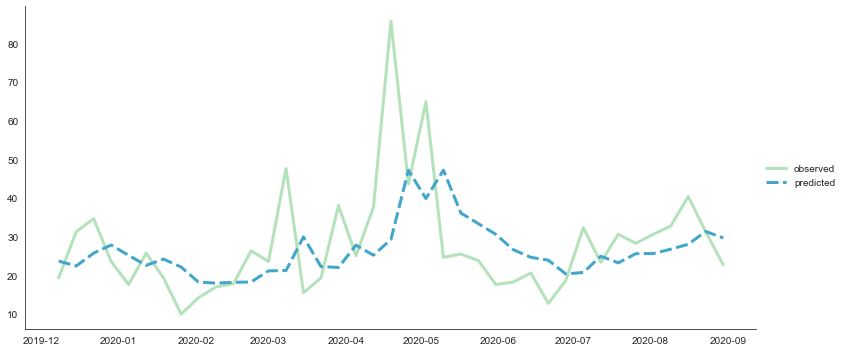

In [6]:
# plot nb10_1: observed and predicted ufos corona timeframe

sns.set_context(font_scale=1.5, rc={"lines.linewidth": 3})
  
fig = sns.relplot(data=tufa, aspect=15/7,kind="line",palette='GnBu')
   
sns.despine()

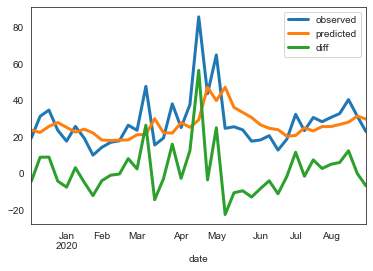

In [7]:
# plot nb10_2: observed and predicted ufos corona timeframe + difference

# d(iffence)ufa df
dufa = tufa.copy()

# diff col
dufa['diff'] = tufa.observed-tufa.predicted

# plot
plot10_3 = dufa.plot()

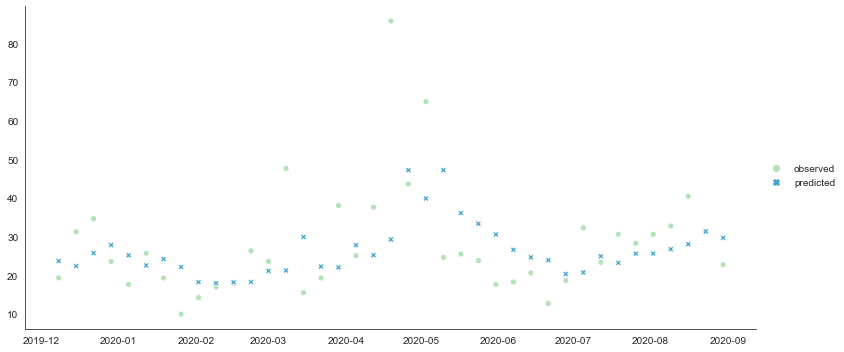

In [8]:
# plot nb10_3: observed and predicted ufos corona timeframe - scatter

plot10_3 = sns.relplot(data=tufa, aspect=15/7,palette='GnBu');

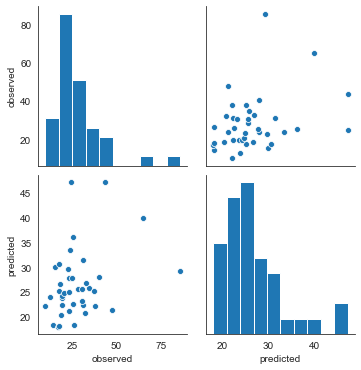

In [9]:
# plot nb10_4: observed and predicted ufos corona timeframe - pairplot

plot10_4 = sns.pairplot(data=tufa)